**<span style="font-size:40px;">Introduction:</span>**



Gross Domestic Product (GDP) is the standard measure of the value created by a country on the world stage through the production of goods and services throughout a given time. GDP per capita however is the sum of gross value added by all resident producers in the economy plus any product taxes (less subsidies) not included in the valuation of output, divided by mid-year population. In simpler terms, GDP per capita is a metric that shows the economic output per person. GDP and GDP per Capita are mostly calculated yearly although quarterly calculations are common though they are not as common as the yearly ones. Both GDP and GDP per capita do similar things but GDP per capita is more preferred since it considers the population of the country.
The GDP per capita metric enables us to quantify the value of the products and services offered by a country per person on the world stage. GDP per capita therefore enables us to quantify and even assess the financial health of a country based on what each member of the population can produce on the world stage. This metric is based on various social, economic, and political factors in the country and they vary from country to country. Navigating the blend of factors is crucial to businesses and governments.

**<span style="font-size:40px;">Business Understanding:</span>**





For businesses being able to keep up and account for these factors is crucial. This is because it may affect investment opportunities and the returns of an investment negatively when wrong information is used to make decisions and positively when the right information is obtained about a country's factors. For governments, being able to stay on top of these factors is crucial since it enables planning that will enable for maximization of resources and boost their global output. 
The social factors that may affect GDP per capita include the health of the population, years of education, and spending habits of the population. Social factors and especially health factors are the most difficult to make accurate predictions and inferences on despite being one of the most important. This is because theoretically, a country with a healthy population can keep its population to work with very minimal disruptions as a result of health problems and more skilled workers can work more to benefit businesses and the economy.

**<span style="font-size:20px;">Problem Statement:</span>**




Axis Investment and Consultancy is a world leading Wealth management, Investment Solutions and Consultancy company that believe that people at the core of any business and they determine if a business is successful or not. They are looking to invest in a business but are also cognizant of the economic health (GDP per capita) of the country they are based in. They believe that the health metrics of the population of a given country can determine if a country is doing well economically. However, they do not have any relevant information to prove this.

The information gained from analyzing the health and social metrics of countries across the world and the GDP per capita of the said countries can help the company to gain an edge in the global market by giving a clear picture what country they can invest in due to the labour force. 
This can be done by collecting health and key economic data from relevant and trusted global organizations that can be analyzed to give important information as to enable business decisions to be made accurately.


**<span style="font-size:20px;">Main Objective:</span>**



To collect various health, social and economic data on various countries across the world from trusted and reliable sources and use statistical analysis skills to find and explore various relationships between the health and social aspects and GDP per capita. 

**<span style="font-size:20px;">Secondary Objective:</span>**




To offer greater and more valuable economic insight on global economic landscape through our findings
To track how Kenya is doing on the global stage through analysis


Null Hypothesis: Theres no statistically significant relation between GDP and the various health variables of countries



Alternative Hypothesis: Theres a statistically significant relation between GDP and the various health variables of countries

**<span style="font-size:40px;">Data Understanding:</span>**

Importing Relevant Libraries

In [30]:
# import relevant libraries
import pandas as pd
import numpy as np
from numpy import average
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels as sm 
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


### Columns with their descriptions
**Country**
Country

**Year**
Year

**Status**
Developed or Developing status

**Life expectancy**
Life Expectancy in age

**Adult Mortality**
Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

**infant deaths**
Number of Infant Deaths per 1000 population

**Alcohol**
Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**percentage expenditure**
Expenditure on health as a percentage of Gross Domestic Product per capita(%)

**Hepatitis B**
Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

**Measles**
Measles - number of reported cases per 1000 population

**BMI**
Average Body Mass Index of entire population

**under-five deaths**
Number of under-five deaths per 1000 population

**Polio**
Polio (Pol3) immunization coverage among 1-year-olds (%)

**Total expenditure**
General government expenditure on health as a percentage of total government expenditure (%)

**Diphtheria**
Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

**HIV/AIDS**
Deaths per 1 000 live births HIV/AIDS (0-4 years)

**GDP**
Gross Domestic Product per capita (in USD)

**Population**
Population of the country

**thinness 1-19 years**
Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

**thinness 5-9 years**
Prevalence of thinness among children for Age 5 to 9(%)

**Income composition of resources**
Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

**Schooling**
Number of years of Schooling(years)

### Import data from Life Expectancy.csv
Loading the Data Set and Reviewing the Data.


In [31]:
#importing the data set
led = pd.read_csv("led.csv")
led

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
#Show dataframe information
led.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

In [4]:
#checking number of rows and columns in the dataset
led.shape

(2938, 22)

In [5]:
#inspecting the first 10 rows of the data set
led.head(10)

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [6]:
#inspecting the last 10 rows of the data set
led.tail(10)

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5
2932,Zimbabwe,2005,Developing,44.6,717.0,28,4.14,8.717409,65.0,420,...,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.000000,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [7]:
#review the statistical summary of the data set
led.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
#view the columns of the data set
led.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [32]:
#countries located in east africa
columns = led.select_dtypes(include='float').columns.to_list()
east_africa_countries = [
    'Burundi',
    'Comoros',
    'Djibouti',
    'Eritrea',
    'Ethiopia',
    'Kenya',
    'Madagascar',
    'Malawi',
    'Mauritius',
    'Mozambique',
    'Rwanda',
    'Seychelles',
    'Somalia',
    'South Sudan',
    'Sudan',
    'Tanzania',
    'Uganda',
    'Zambia',
    'Zimbabwe'
]
columns

['Lifeexpectancy',
 'AdultMortality',
 'Alcohol',
 'percentageexpenditure',
 'HepatitisB',
 'BMI',
 'Polio',
 'Totalexpenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness1-19years',
 'thinness5-9years',
 'Incomecompositionofresources',
 'Schooling']

In [33]:
#info on countries in east africa
ea_countries = led[led['Country'].isin(east_africa_countries)]
ea_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 416 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       272 non-null    object 
 1   Year                          272 non-null    int64  
 2   Status                        272 non-null    object 
 3   Lifeexpectancy                272 non-null    float64
 4   AdultMortality                272 non-null    float64
 5   infantdeaths                  272 non-null    int64  
 6   Alcohol                       255 non-null    float64
 7   percentageexpenditure         272 non-null    float64
 8   HepatitisB                    215 non-null    float64
 9   Measles                       272 non-null    int64  
 10  BMI                           256 non-null    float64
 11  under-fivedeaths              272 non-null    int64  
 12  Polio                         272 non-null    float64
 13  To

In [34]:
#finding the values of the null values in the east africa data frame
ea_countries.isna().sum()

Country                          0
Year                             0
Status                           0
Lifeexpectancy                   0
AdultMortality                   0
infantdeaths                     0
Alcohol                         17
percentageexpenditure            0
HepatitisB                      57
Measles                          0
BMI                             16
under-fivedeaths                 0
Polio                            0
Totalexpenditure                32
Diphtheria                       0
HIV/AIDS                         0
GDP                             17
Population                      20
thinness1-19years               16
thinness5-9years                16
Incomecompositionofresources    16
Schooling                       16
dtype: int64

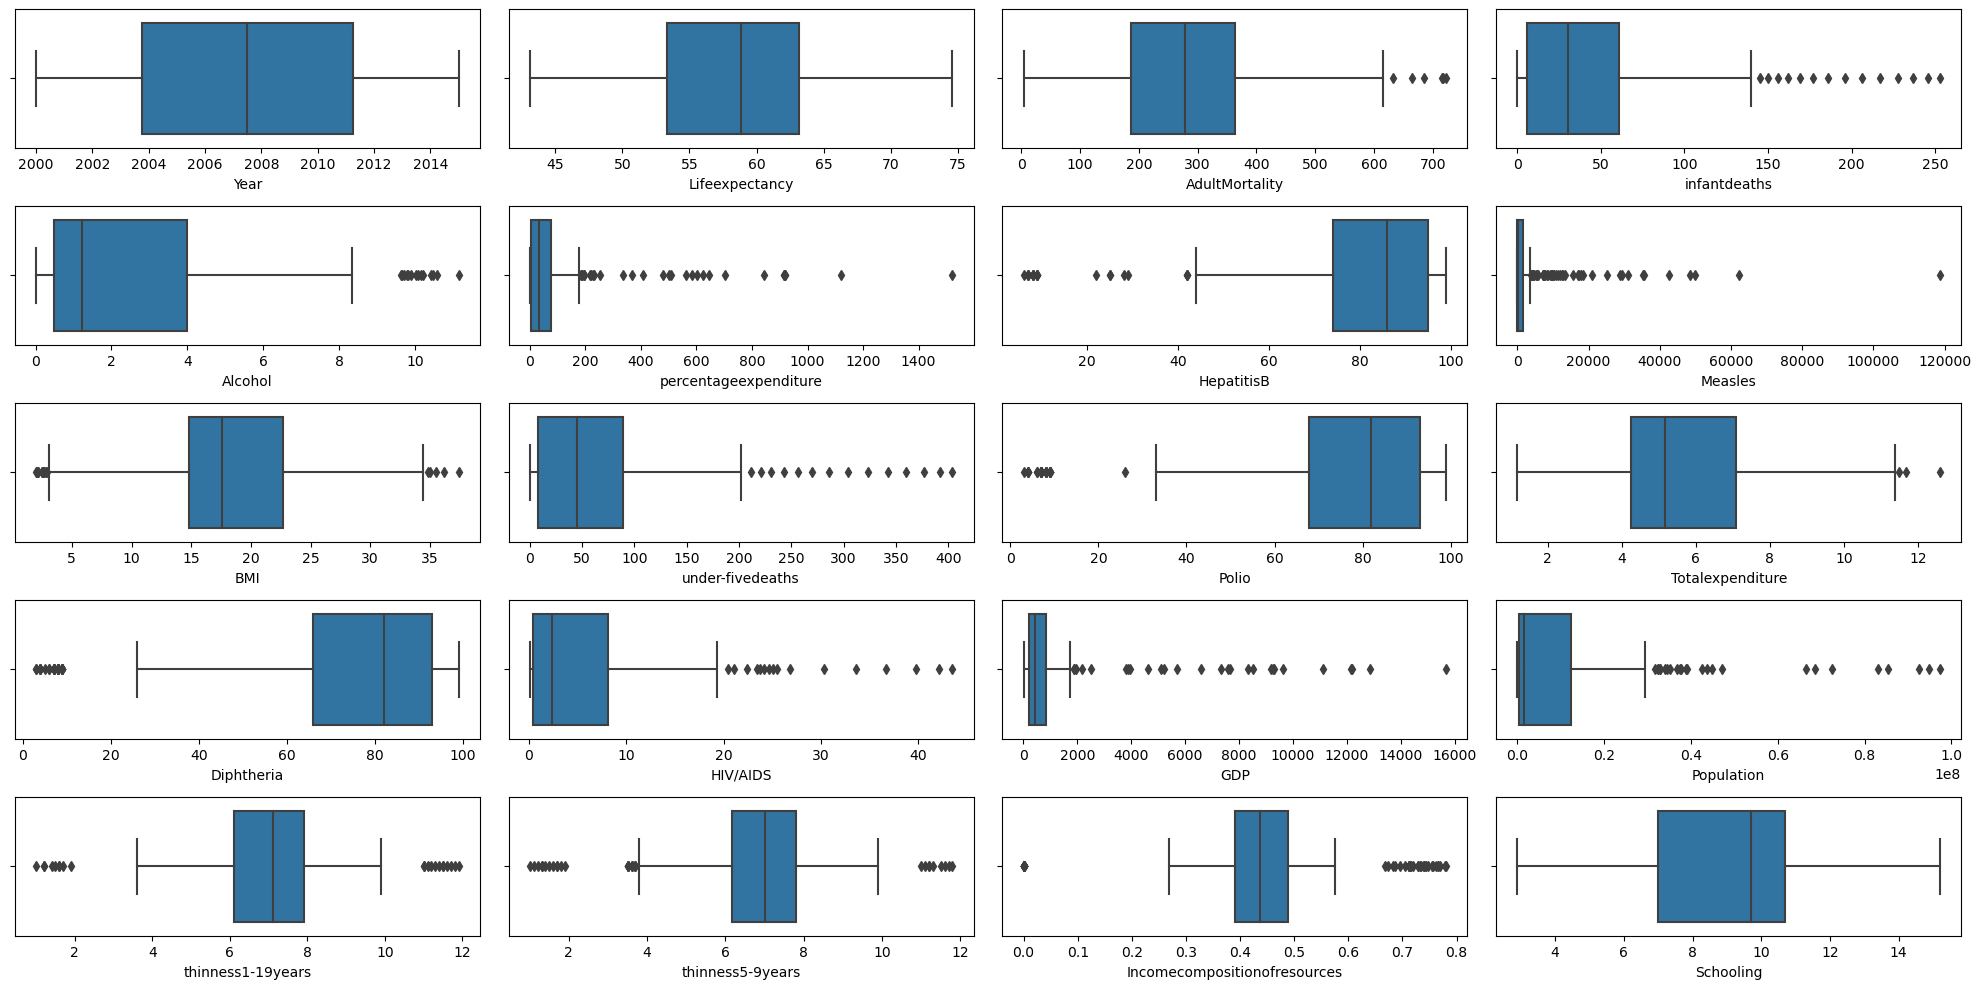

In [35]:
#showing outliers in the east africa data using box plots
count = 1

fig = plt.figure(figsize = [20, 10])
cols_ea = ea_countries.select_dtypes(exclude=['object']).columns.tolist()

for col in cols_ea:
    plt.subplot(5, 4, count)
    sns.boxplot(x = ea_countries[col])
    count += 1
plt.tight_layout()
plt.show()

The figure above shows the box-plot diagrams of the features in the East African dataframe. From the figure above we can easily see the outliers in the various data features

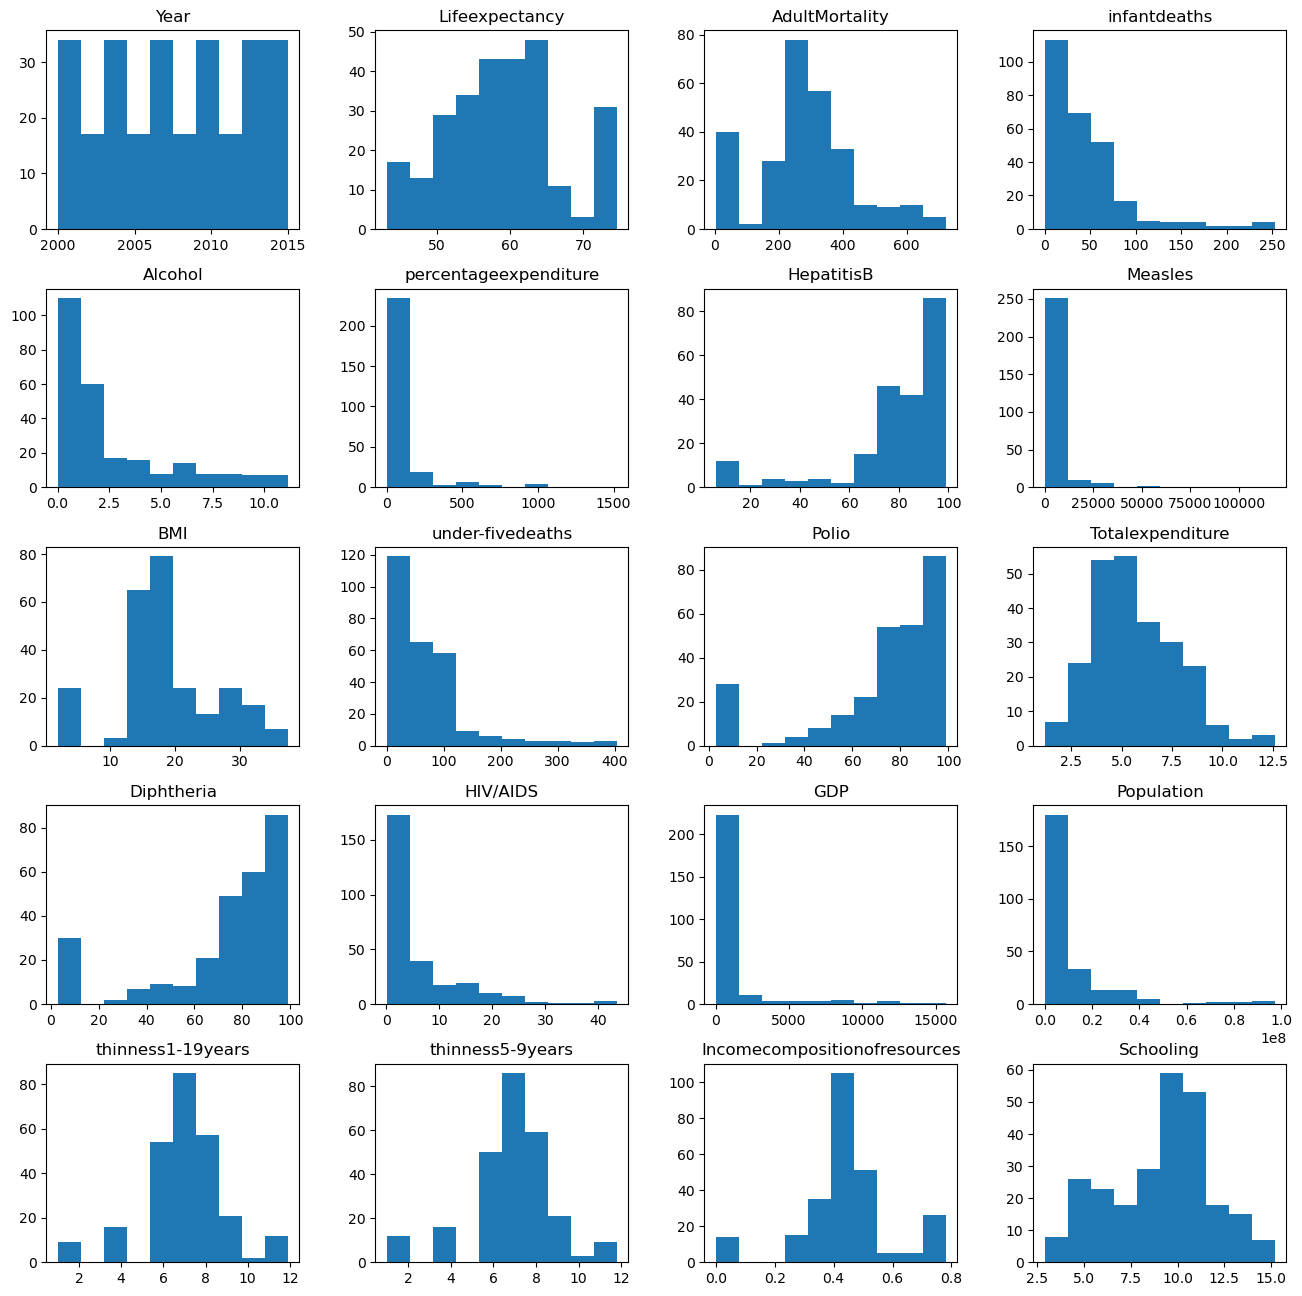

In [36]:
#histogram subplots showing frequency distribution in the dataframe
ea_countries.hist(figsize=(16,16),grid=False);

The figures below are histograms showing the frequency and distribution of the data features in the East Afican data frame 

In [37]:
(len(led) - len(ea_countries)) / len(led)

0.9074200136147039

Data Cleaning of Life Expectancy Data Set
The section section seeks to handle missing values in the dataset for clean data to perform statistical analysis

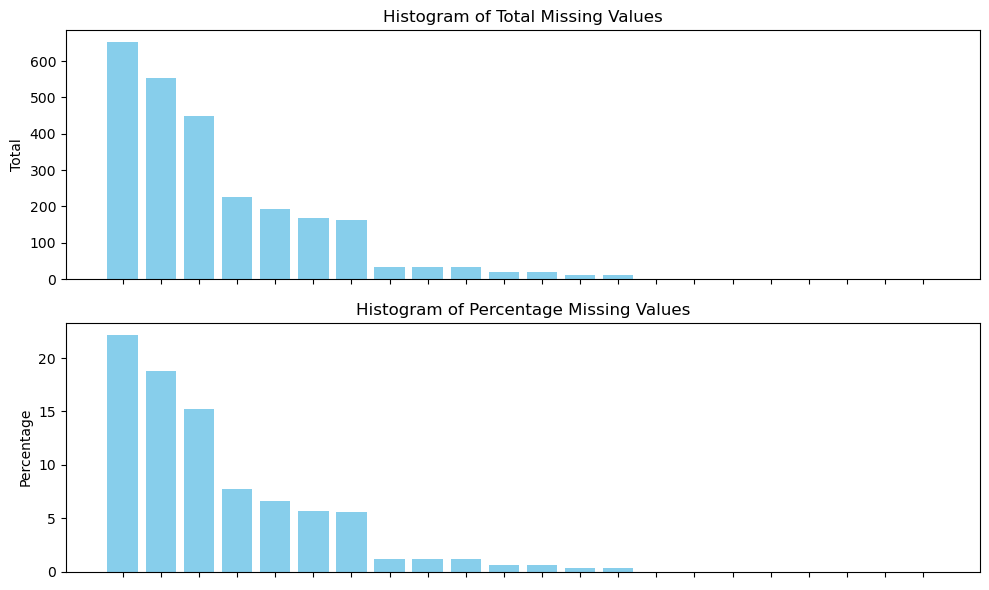

,Total,Percentage
Population,652,22.19
HepatitisB,553,18.82
GDP,448,15.25
Totalexpenditure,226,7.69
Alcohol,194,6.60
Incomecompositionofresources,167,5.68
Schooling,163,5.55
thinness5-9years,34,1.16
thinness1-19years,34,1.16
BMI,34,1.16


In [38]:
#function that calculates the missing values and their percentages and plots a histogram
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)   
    percentage = round((total / data.shape[0]) * 100, 2)
    perc_null = pd.concat([total, percentage], axis=1, keys=['Total','Percentage'])
    num_cols = data.shape[1]  # Number of columns
    num_rows = 2  # Assuming 2 rows for Total and Percentage
    
    fig, axes = plt.subplots(num_rows, 1, figsize=(10, 6), sharex=True)
    
    for i, (ax, col) in enumerate(zip(axes, perc_null.columns)):
        ax.bar(perc_null.index, perc_null[col], color='skyblue')
        ax.set_ylabel(col)
        ax.set_title(f'Histogram of {col} Missing Values')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

    
    return perc_null
missing_values(led)

The function in the cell above finds missing or Nan values in the main data frame (led) and it shows the total number of missing values per column and a percentage of the data that is null

We can see that there are 14 columns with missing values. The column with the most missing or null values is 652 which accounts for about 22.19 percent of the total values in the column. 

In order to deal with these missing values we will need to drop these values. This is because if we substitute the missing values with any measure of central tendancy it will greatly affect the accuracy of the data analysis that is going to be carried out and this will inturn affect our observations. We can also afford to drop these values because there are 2938 records and this is more than enough. Dropping them won't greatly affect our analysis

In [39]:
#drop rows in the entire data that have missing values
# Assuming df is your DataFrame
led = led.dropna()
led



,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [40]:
led.isna().sum()

Country                         0
Year                            0
Status                          0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
under-fivedeaths                0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1-19years               0
thinness5-9years                0
Incomecompositionofresources    0
Schooling                       0
dtype: int64

We can see from the above that the null and missing values have been dropped

In [12]:
#check dataset information
led.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       1649 non-null   object 
 1   Year                          1649 non-null   int64  
 2   Status                        1649 non-null   object 
 3   Lifeexpectancy                1649 non-null   float64
 4   AdultMortality                1649 non-null   float64
 5   infantdeaths                  1649 non-null   int64  
 6   Alcohol                       1649 non-null   float64
 7   percentageexpenditure         1649 non-null   float64
 8   HepatitisB                    1649 non-null   float64
 9   Measles                       1649 non-null   int64  
 10  BMI                           1649 non-null   float64
 11  under-fivedeaths              1649 non-null   int64  
 12  Polio                         1649 non-null   float64
 13  Tot

After the null values have been dropped we are left with 1694 records

In [41]:
#renaming some column names to make them easier to use
led = led.rename(columns={'thinness1-19years':'thinness1_19years','thinness5-9years':'thinness5_9years','under-fivedeaths':'under_fivedeaths'})
led.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under_fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1_19years',
       'thinness5_9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [42]:
#creates a list of all column names
columns = led.select_dtypes(include='float').columns.to_list()

In [43]:
#calculating the percentage of values dropped
percent_of_dropped = (2938 - 1649)/2938 * 100
percent_of_dropped

43.87338325391423

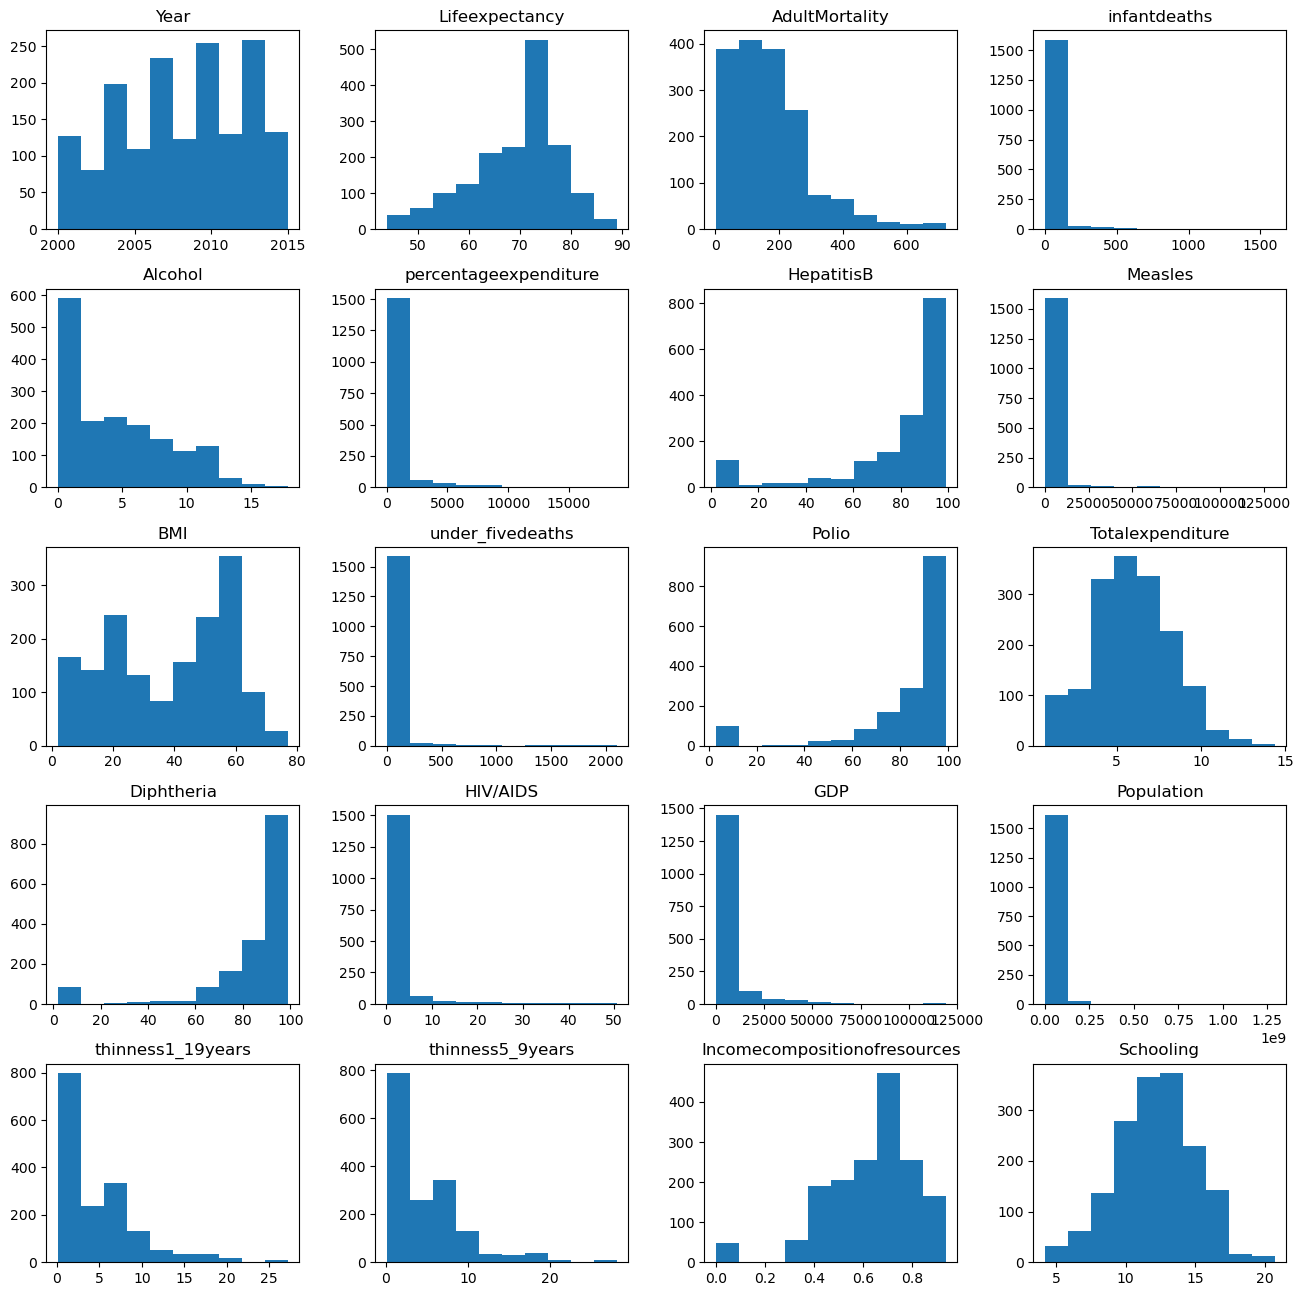

In [44]:
#generates subplots of histograms in the dataframe
led.hist(bins=10,figsize=(16,16),grid=False);

The figure above contains subplots of histograms the various data columns in the dataframe. This shows the frequency and distribution of the values in each column

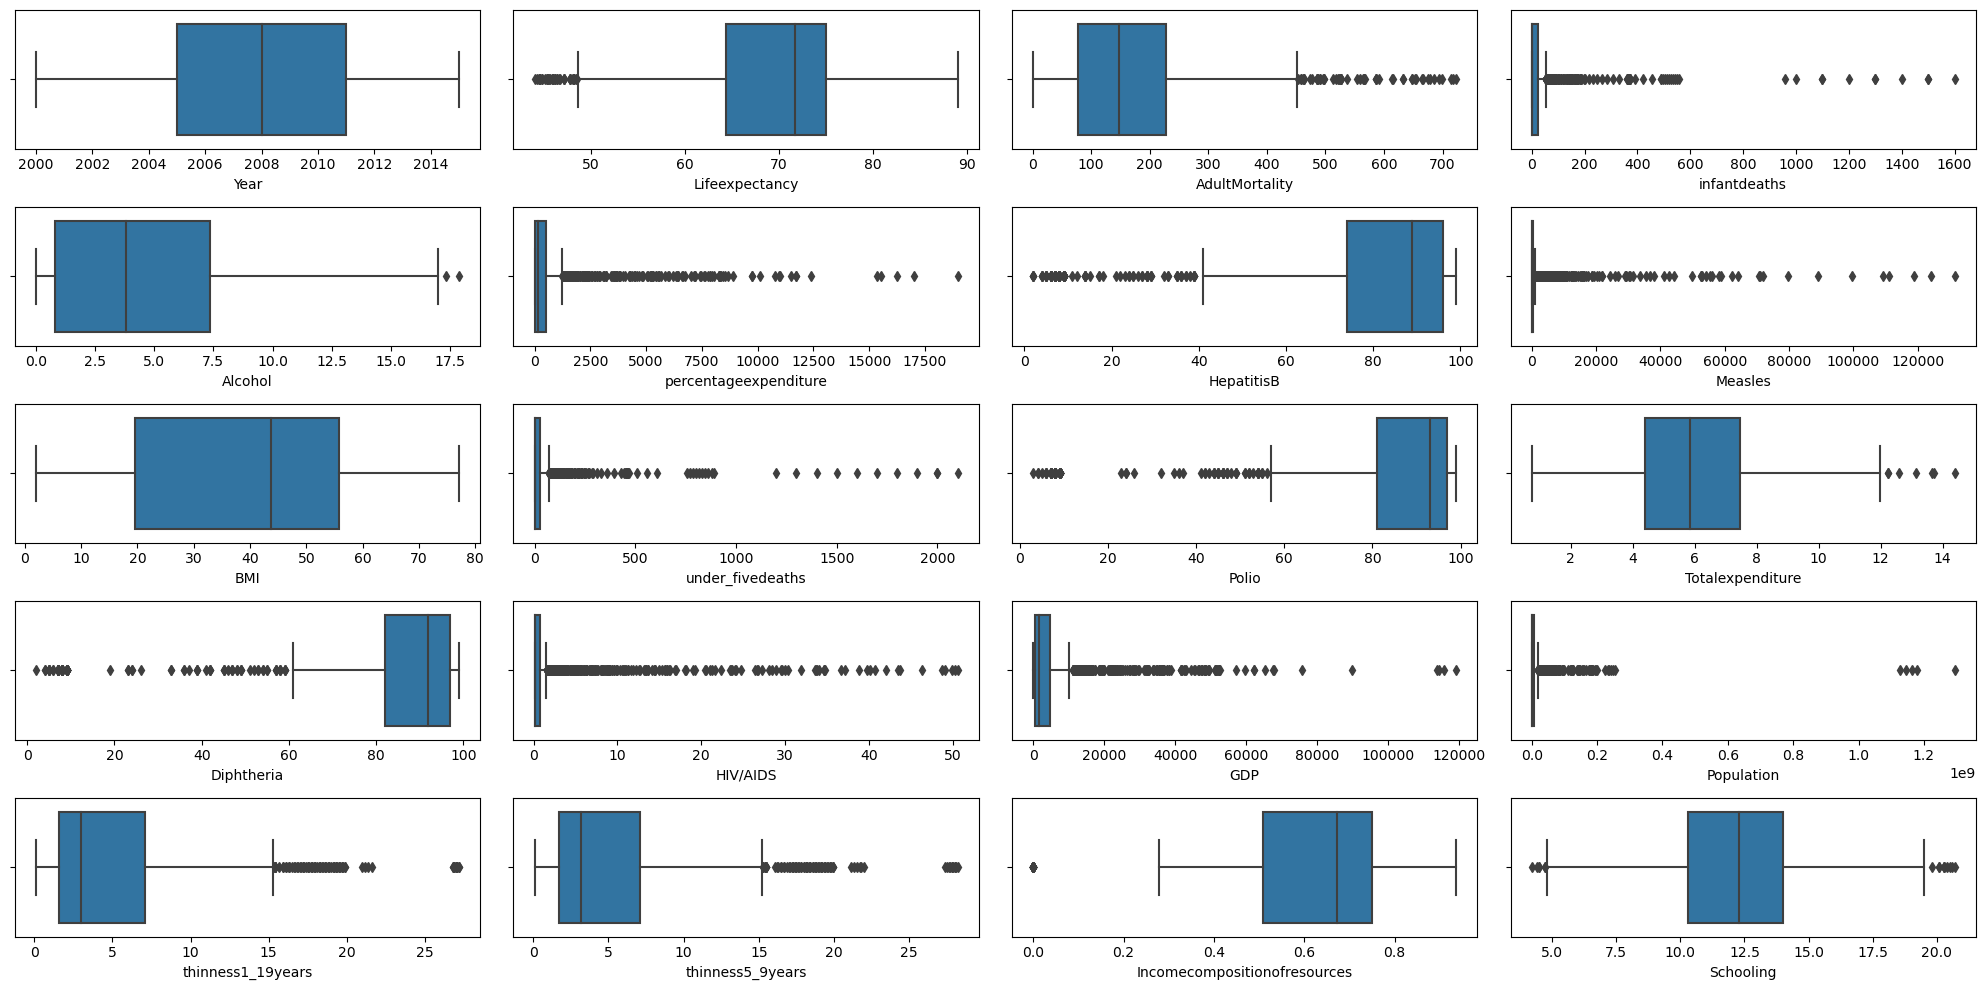

In [45]:
#generating boxplots to show outliers

count = 1

fig = plt.figure(figsize = [20, 10])
cols = led.select_dtypes(exclude=['object']).columns.tolist()

for col in cols:
    plt.subplot(5, 4, count)
    sns.boxplot(x = led[col])
    count += 1
plt.tight_layout()
plt.show()

The figure above shows the box-plots of all the data column or features in the dataframe. From the figures above you can clearly see the outlier in the data columns

In the cell below we remove the outliers inorder to improve the accuracy

In [46]:
#removing outliers using the quartile method
Q1 = led[columns].quantile(0.25)
Q3 = led[columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((led[columns] < (Q1 - 1.7 * IQR)) | (led[columns] > (Q3 + 1.7 * IQR))).any(axis=1)

led_n = led[~outliers]

led_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 16 to 2851
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       796 non-null    object 
 1   Year                          796 non-null    int64  
 2   Status                        796 non-null    object 
 3   Lifeexpectancy                796 non-null    float64
 4   AdultMortality                796 non-null    float64
 5   infantdeaths                  796 non-null    int64  
 6   Alcohol                       796 non-null    float64
 7   percentageexpenditure         796 non-null    float64
 8   HepatitisB                    796 non-null    float64
 9   Measles                       796 non-null    int64  
 10  BMI                           796 non-null    float64
 11  under_fivedeaths              796 non-null    int64  
 12  Polio                         796 non-null    float64
 13  Tot

In [48]:
#calculates correlation figures in respect to GDP
led.corr()['GDP']

Year                            0.096421
Lifeexpectancy                  0.441322
AdultMortality                 -0.255035
infantdeaths                   -0.098092
Alcohol                         0.443433
percentageexpenditure           0.959299
HepatitisB                      0.041850
Measles                        -0.064768
BMI                             0.266114
under_fivedeaths               -0.100331
Polio                           0.156809
Totalexpenditure                0.180373
Diphtheria                      0.158438
HIV/AIDS                       -0.108081
GDP                             1.000000
Population                     -0.020369
thinness1_19years              -0.277498
thinness5_9years               -0.277959
Incomecompositionofresources    0.446856
Schooling                       0.467947
Name: GDP, dtype: float64

<Axes: >

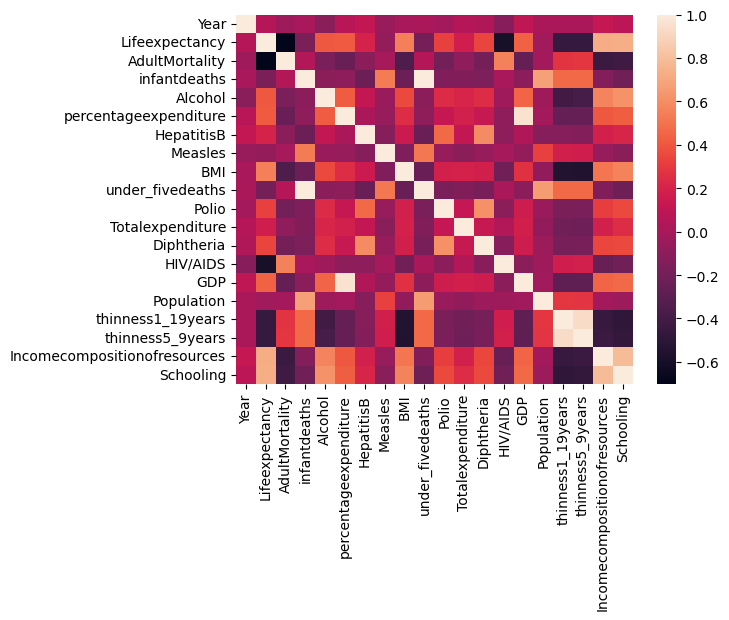

In [47]:
#This is a correlation heatmap
sns.heatmap(led.corr())

The correlation heatmap shows hiw various features in the data set are correlated with each other. The darker colors at the intersetion of the features shows a strong negative correlation value. This means that they may be inversly proportional. The lighter or closer to white the colors are shows a stronger positive correlation and may indicate that the features are more positively correlated

<Axes: title={'center': 'Percentages of developed  vs. developing  countries.'}>

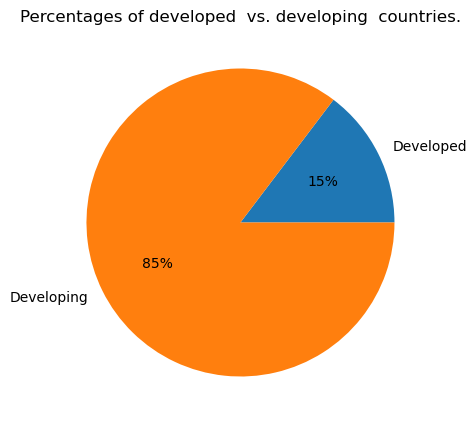

In [49]:
#generates a piechart showing developed against developing countries
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))
plt.title("Percentages of developed  vs. developing  countries.")
ax1.set_ylabel("", size=0)
led.groupby('Status').size().plot(kind='pie', autopct=lambda val: f'{val:.0f}%', ax=ax1)

The following figure shows the life expectancies against the Country

Text(0.5, 1.0, 'Country against Life Expectancy')

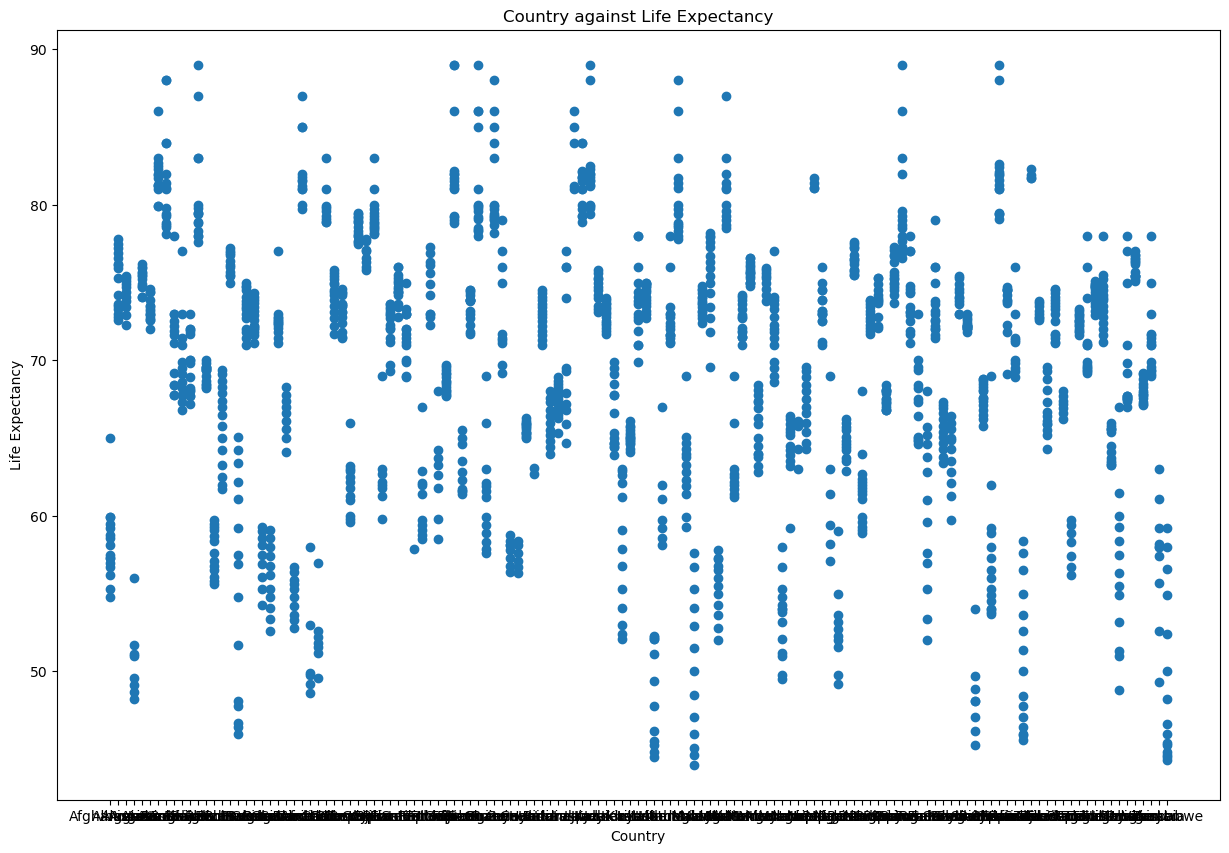

In [17]:
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.scatter((led.Country), led.Lifeexpectancy)
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Country against Life Expectancy')

The pie-chart above shows how the countries in the data set are split. The countries represented in orange which is 85 percent of the pie-chart are Developing countries. The countries in blue and occupy 15 percent of the pie-chart are developed countries

In [19]:
developing_gdp_list = gdp_average_over_years(led)
print(developing_gdp_list)
#print(developed_gdp_list)

[1990.82, nan]


The Analysis of the Data is focused on Kenya to assist  Axis Investment and Consultancy seek to understanding the Country Economic health and it underlying factors this will guide to know the Kenya Economic Health

In [20]:
#selection of Country data
kenya_data = led[led['Country'] == 'Kenya']
kenya_data

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
1363,Kenya,2014,Developing,62.9,255.0,56,0.01,170.962662,92.0,354,...,93.0,5.72,92.0,2.9,1335.645800,462425.0,7.8,7.7,0.546,11.1
1364,Kenya,2013,Developing,62.6,258.0,58,1.84,165.930498,93.0,190,...,94.0,5.57,87.0,3.0,1229.114798,44826849.0,7.9,7.7,0.541,11.1
1365,Kenya,2012,Developing,62.1,263.0,59,1.81,154.226970,94.0,0,...,94.0,5.49,94.0,3.0,1155.258200,43646629.0,8.0,7.8,0.536,11.1
1366,Kenya,2011,Developing,61.2,278.0,60,1.80,109.705184,96.0,2395,...,97.0,5.23,96.0,3.4,987.445397,42486839.0,8.1,7.9,0.530,11.1
1367,Kenya,2010,Developing,63.0,294.0,61,1.73,56.589842,9.0,95,...,9.0,3.97,9.0,4.3,967.347730,4135152.0,8.2,8.0,0.523,11.1
1368,Kenya,2009,Developing,59.1,317.0,62,1.86,7.146851,88.0,1218,...,89.0,4.17,88.0,5.0,92.816252,423724.0,8.2,8.1,0.514,10.7
1369,Kenya,2008,Developing,57.9,339.0,64,1.71,60.515351,88.0,1282,...,88.0,3.90,88.0,6.4,916.899251,39148416.0,8.3,8.2,0.506,10.4
1370,Kenya,2007,Developing,56.8,356.0,66,1.97,59.833614,81.0,1516,...,76.0,4.80,81.0,9.1,839.181117,388599.0,8.4,8.3,0.494,10.1
1371,Kenya,2006,Developing,55.3,388.0,68,1.76,52.603854,8.0,1847,...,77.0,4.24,8.0,10.3,697.663850,37525.0,8.5,8.4,0.483,9.7
1372,Kenya,2005,Developing,54.1,412.0,70,1.82,39.556775,76.0,153,...,7.0,4.36,76.0,11.6,519.799935,3648288.0,8.6,8.5,0.474,9.6


<Axes: >

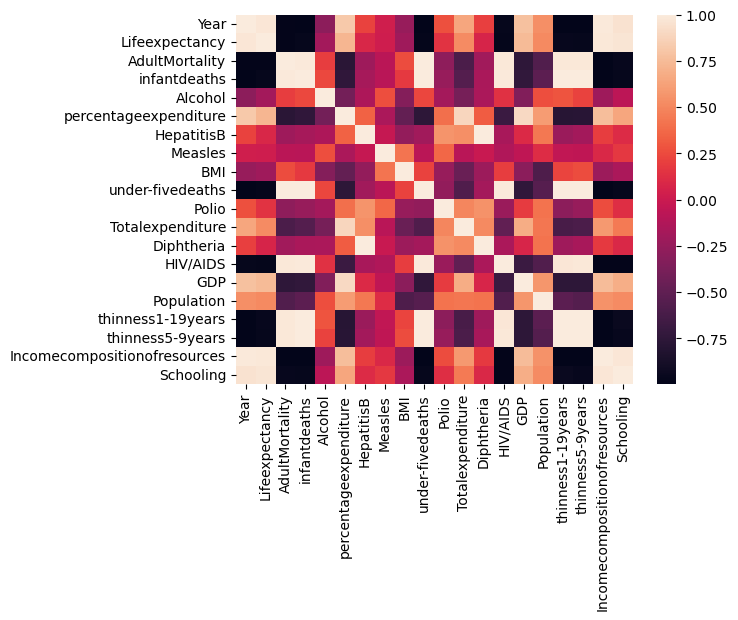

In [21]:
#correlation between various data features in the Kenya data figures
sns.heatmap(kenya_data.corr())

The heatmap above shows the features from the kenya_data ,which is a subset of data about Kenya from the global data set, and how the correlate with one another 



The following cells show how the features from the kenya_data correlate with GDP which will be the prdeicted values

In [22]:
#correlation between gdp and Polio
gdp_schooling_correl = kenya_data[['GDP','Polio']].corr().loc['GDP','Polio']
gdp_schooling_correl

0.1854804629862049

In [23]:
#correlation between gdp and Measles
gdp_schooling_correl = kenya_data[['GDP','Measles']].corr().loc['GDP','Measles']
gdp_schooling_correl

-0.057688256993720266

In [24]:
#correlation between gdp and Hiv/ Aids
gdp_schooling_correl = kenya_data[['GDP','HIV/AIDS']].corr().loc['GDP','HIV/AIDS']
gdp_schooling_correl

-0.6924852408411154

In [25]:
#correlation between gdp and income composition
gdp_schooling_correl = kenya_data[['GDP','Incomecompositionofresources']].corr().loc['GDP','Incomecompositionofresources']
gdp_schooling_correl


0.7524362285301051

In [26]:
y = led["GDP"]
x_df = led.drop(['GDP', 'Country'], axis=1).select_dtypes("number")
X_1 = x_df

In [27]:
model_1 = sm.OLS(y, sm.add_constant(X_1))
model_1_results = model_1.fit()

#print(model_1_results.summary())

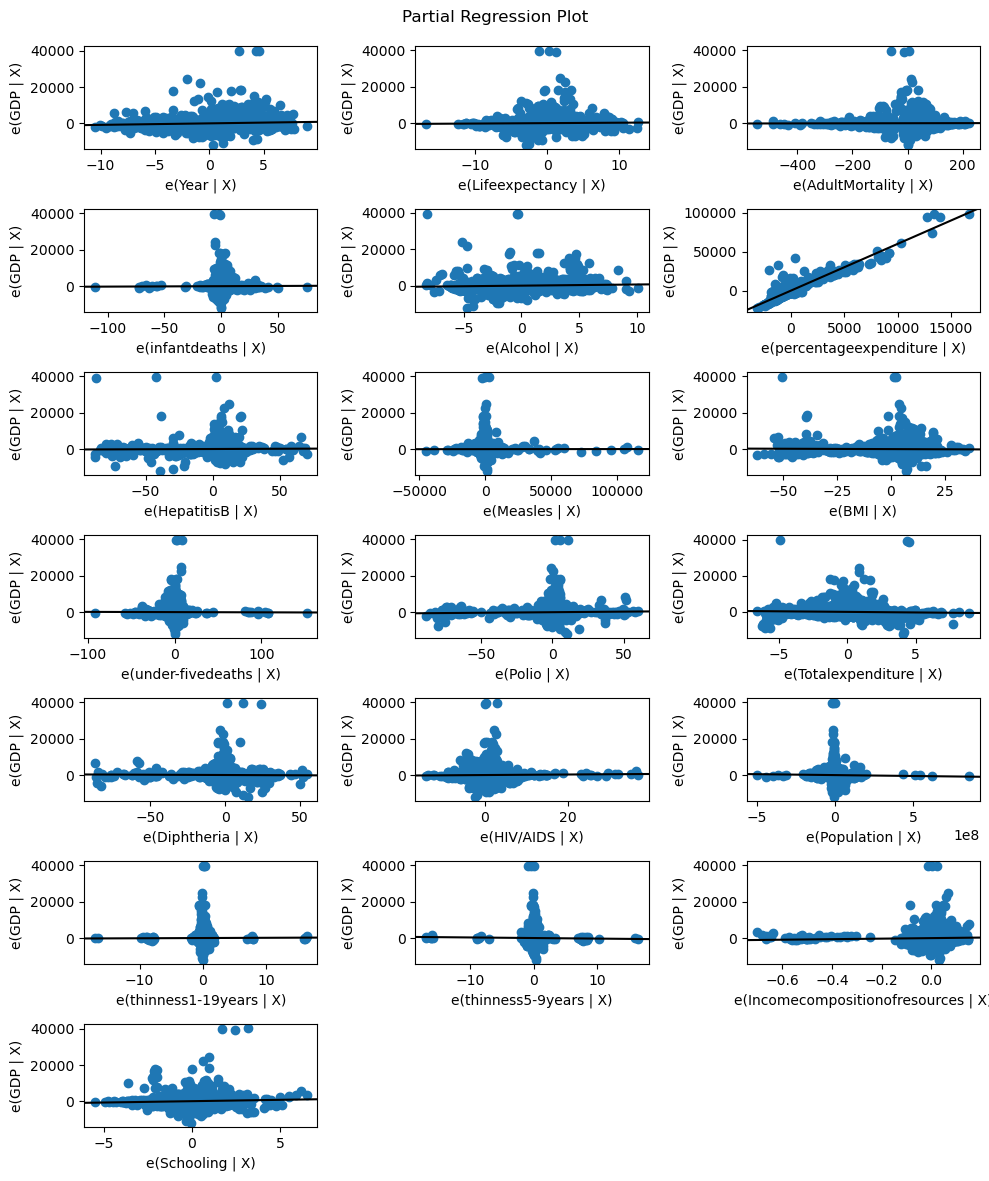

In [28]:
fig = plt.figure(figsize=(10,12))
sm.graphics.plot_partregress_grid(model_1_results, exog_idx=list(X_1.columns.values), grid=(7,3), fig=fig)
plt.show()

In [29]:
print(model_1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1085.
Date:                Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:47:20   Log-Likelihood:                -15599.
No. Observations:                1649   AIC:                         3.124e+04
Df Residuals:                    1629   BIC:                         3.135e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           